In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [ ]:
print("Train shape : ",X_train.shape)
print("Test shape : ",X_test.shape)

Train shape :  (50000, 32, 32, 3)
Test shape :  (10000, 32, 32, 3)


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
X_train[70].size

3072

In [ ]:
y_train[70]

5

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def show_image(X,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


In [ ]:
# Normalisation of data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

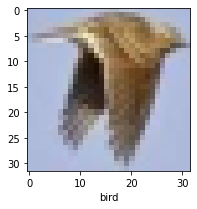

In [ ]:
show_image(X_train,y_train,123)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=128,epochs=100,
                    verbose=1)

Epoch 1/100
391/391 [==============================] - 3s 7ms/step - loss: 1.6245 - accuracy: 0.4134 - val_loss: 1.3681 - val_accuracy: 0.5114
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.2973 - accuracy: 0.5395 - val_loss: 1.2163 - val_accuracy: 0.5750
Epoch 3/100
391/391 [==============================] - 2s 6ms/step - loss: 1.1663 - accuracy: 0.5903 - val_loss: 1.1201 - val_accuracy: 0.6154
Epoch 4/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0782 - accuracy: 0.6223 - val_loss: 1.0362 - val_accuracy: 0.6450
Epoch 5/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0139 - accuracy: 0.6447 - val_loss: 0.9892 - val_accuracy: 0.6636
Epoch 6/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9662 - accuracy: 0.6624 - val_loss: 0.9461 - val_accuracy: 0.6729
Epoch 7/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9343 - accuracy: 0.6746 - val_loss: 0.9460 - val_accuracy: 0.6728

In [ ]:
print('\nhistory dict:', history.history)


history dict: {'loss': [1.624483585357666, 1.2973204851150513, 1.1662732362747192, 1.0781631469726562, 1.0139377117156982, 0.9662472605705261, 0.9342920184135437, 0.8950093984603882, 0.8668240904808044, 0.8362981081008911, 0.812879204750061, 0.7881840467453003, 0.7734126448631287, 0.7459472417831421, 0.7391957640647888, 0.7193875908851624, 0.7028549909591675, 0.6901588439941406, 0.6774693131446838, 0.6549627184867859, 0.645967423915863, 0.6370435357093811, 0.6289056539535522, 0.6214122772216797, 0.609879195690155, 0.5974698066711426, 0.5837897658348083, 0.5858917832374573, 0.5665428638458252, 0.5581225752830505, 0.5536388158798218, 0.547635555267334, 0.5395957231521606, 0.533480167388916, 0.5286372900009155, 0.5199593901634216, 0.5183083415031433, 0.5147161483764648, 0.500575065612793, 0.49656903743743896, 0.4879923462867737, 0.48273393511772156, 0.47894716262817383, 0.4759286344051361, 0.4711472690105438, 0.46696868538856506, 0.4581240713596344, 0.45792731642723083, 0.453230887651443

In [ ]:
# retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']                         
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))        ## get number of epochs

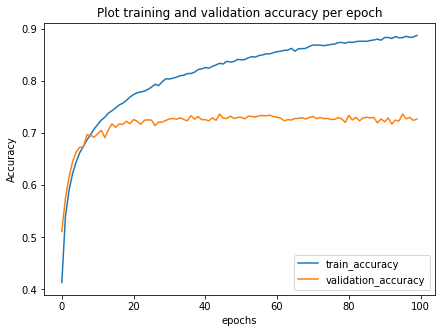

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()

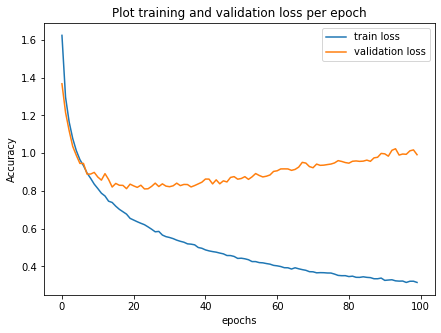

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

In [ ]:
print("[INFO] Evaluating ... ")
(loss,accuracy) = cnn.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
79/79 [==============================] - 0s 4ms/step - loss: 0.9922 - accuracy: 0.7267
[INFO] accuracy : 72.67%


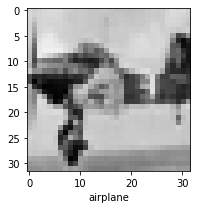

In [ ]:
show_image(X_test, y_test,153)